In [10]:
import pandas as pd
import requests
import numpy as np # Import numpy here

# Base URL of the GitHub repository
github_url = "https://github.com/PhonePe/pulse"

# Constructing raw URLs for potential data files based on repository structure
# Assuming data might be in 'data' directory and then structured by year/quarter
base_raw_url = "https://raw.githubusercontent.com/PhonePe/pulse/master/data/"

# Example raw URLs for transaction data (assuming a common structure)
# We might need to adjust these based on the actual repository structure
transaction_agg_year_url = base_raw_url + "aggregated/transaction/country/india/state/andhra-pradesh/2018/1.json"
transaction_map_year_url = base_raw_url + "map/transaction/country/india/state/andhra-pradesh/2018/1.json"
transaction_top_year_url = base_raw_url + "top/transaction/country/india/state/andhra-pradesh/2018/1.json"

# Example raw URLs for user data
user_agg_year_url = base_raw_url + "aggregated/user/country/india/state/andhra-pradesh/2018/1.json"
user_map_year_url = base_raw_url + "map/user/country/india/state/andhra-pradesh/2018/1.json"
user_top_year_url = base_raw_url + "top/user/country/india/state/andhra-pradesh/2018/1.json"

# Function to load JSON data from a URL
def load_json_from_url(url):
    try:
        response = requests.get(url)
        response.raise_for_status() # Raise an HTTPError for bad responses (4xx or 5xx)
        return response.json()
    except requests.exceptions.RequestException as e:
        print(f"Error loading data from {url}: {e}")
        return None

# Attempt to load one of the files to check the process
# Let's try loading the aggregated transaction data for Andhra Pradesh, 2018, Quarter 1
agg_transaction_data = load_json_from_url(transaction_agg_year_url)

# If data is loaded successfully, convert it to a pandas DataFrame
if agg_transaction_data and 'data' in agg_transaction_data and 'transactionData' in agg_transaction_data['data']:
    df_agg_transaction = pd.DataFrame(agg_transaction_data['data']['transactionData'])
    print("\nDataFrame loaded successfully:")
    display(df_agg_transaction.head())
else:
    df_agg_transaction = None
    print("\nFailed to load data or 'transactionData' key not found.")


DataFrame loaded successfully:


,name,paymentInstruments
0,Recharge & bill payments,"[{'type': 'TOTAL', 'count': 5027448, 'amount':..."
1,Peer-to-peer payments,"[{'type': 'TOTAL', 'count': 3049646, 'amount':..."
2,Merchant payments,"[{'type': 'TOTAL', 'count': 362672, 'amount': ..."
3,Financial Services,"[{'type': 'TOTAL', 'count': 204305, 'amount': ..."
4,Others,"[{'type': 'TOTAL', 'count': 395514, 'amount': ..."


In [12]:
print("First 5 rows of df_agg_transaction:")
display(df_agg_transaction.head())

print("\nData types of each column:")
display(df_agg_transaction.dtypes)

print("\nNumber of missing values in each column:")
display(df_agg_transaction.isnull().sum())

print("\nDescriptive statistics for numerical columns:")
display(df_agg_transaction.describe())

First 5 rows of df_agg_transaction:


,name,paymentInstruments
0,Recharge & bill payments,"[{'type': 'TOTAL', 'count': 5027448, 'amount':..."
1,Peer-to-peer payments,"[{'type': 'TOTAL', 'count': 3049646, 'amount':..."
2,Merchant payments,"[{'type': 'TOTAL', 'count': 362672, 'amount': ..."
3,Financial Services,"[{'type': 'TOTAL', 'count': 204305, 'amount': ..."
4,Others,"[{'type': 'TOTAL', 'count': 395514, 'amount': ..."



Data types of each column:


,0
name,object
paymentInstruments,object



Number of missing values in each column:


,0
name,0
paymentInstruments,0



Descriptive statistics for numerical columns:


,name,paymentInstruments
count,5,5
unique,5,5
top,Recharge & bill payments,"[{'type': 'TOTAL', 'count': 5027448, 'amount':..."
freq,1,1


In [13]:
print("\nExamining the structure of the 'paymentInstruments' column:")
print("Type of paymentInstruments column:", type(df_agg_transaction['paymentInstruments'][0]))
print("Content of the first element in paymentInstruments:", df_agg_transaction['paymentInstruments'][0])
print("Accessing 'count' and 'amount' from the first element:")
print("Count:", df_agg_transaction['paymentInstruments'][0][0]['count'])
print("Amount:", df_agg_transaction['paymentInstruments'][0][0]['amount'])


Examining the structure of the 'paymentInstruments' column:
Type of paymentInstruments column: <class 'list'>
Content of the first element in paymentInstruments: [{'type': 'TOTAL', 'count': 5027448, 'amount': 892293975.6698562}]
Accessing 'count' and 'amount' from the first element:
Count: 5027448
Amount: 892293975.6698562


In [7]:
import numpy as np

df_agg_transaction_flat['amount_per_transaction'] = df_agg_transaction_flat['amount'] / df_agg_transaction_flat['count']
df_agg_transaction_flat['amount_per_transaction'] = df_agg_transaction_flat['amount_per_transaction'].replace([np.inf, -np.inf], 0)
df_agg_transaction_flat['amount_per_transaction'] = df_agg_transaction_flat['amount_per_transaction'].fillna(0)

print("DataFrame with 'amount_per_transaction' column:")
display(df_agg_transaction_flat.head())

DataFrame with 'amount_per_transaction' column:


,name,type,count,amount,amount_per_transaction
0,Recharge & bill payments,TOTAL,5027448,8.922940e+08,177.484476
1,Peer-to-peer payments,TOTAL,3049646,1.052425e+10,3450.974403
2,Merchant payments,TOTAL,362672,2.472976e+08,681.876848
3,Financial Services,TOTAL,204305,4.480845e+07,219.321357
4,Others,TOTAL,395514,2.876260e+08,727.220890


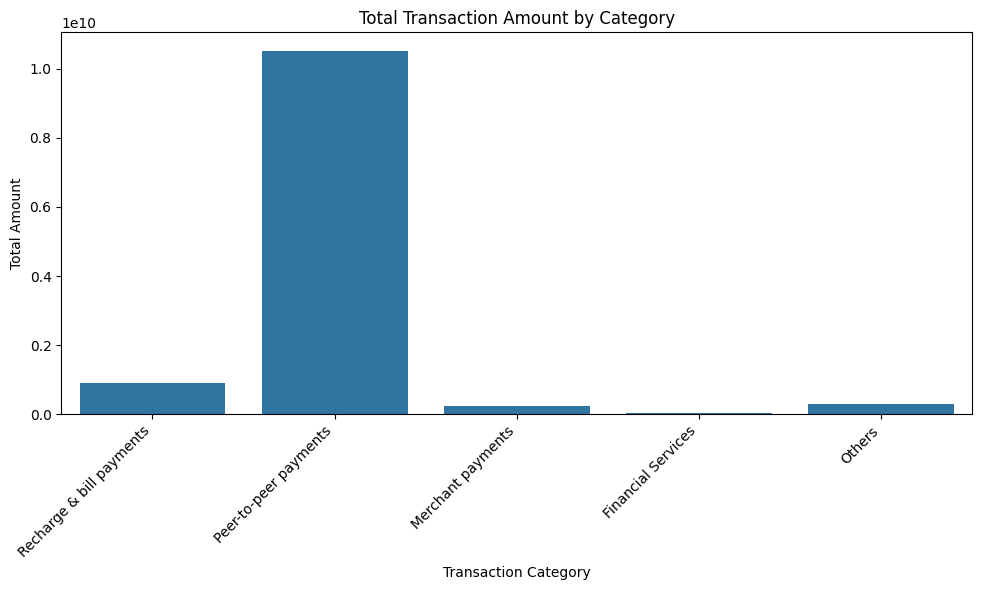

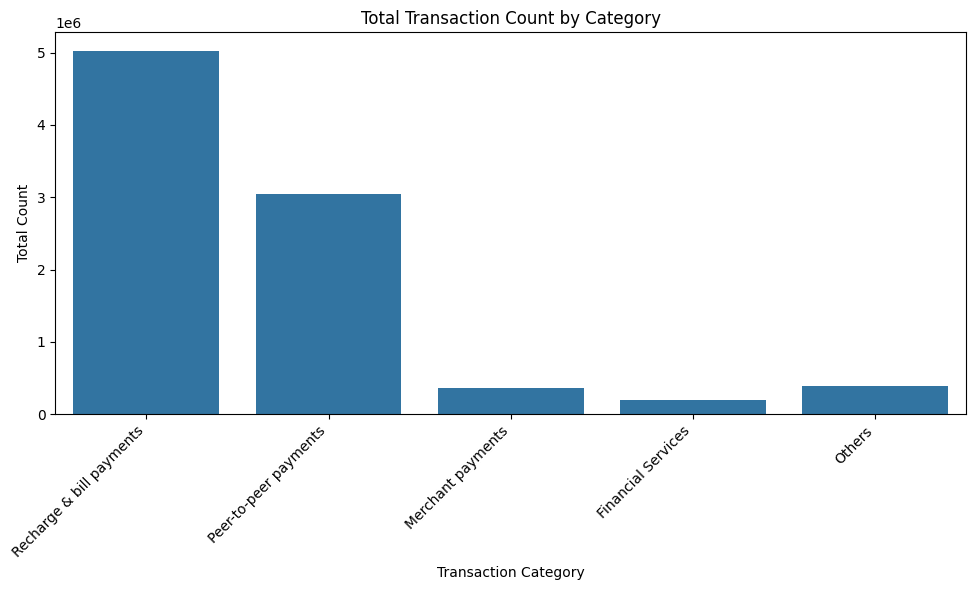

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='name', y='amount', data=df_agg_transaction_flat)
plt.title("Total Transaction Amount by Category")
plt.xlabel("Transaction Category")
plt.ylabel("Total Amount")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='name', y='count', data=df_agg_transaction_flat)
plt.title("Total Transaction Count by Category")
plt.xlabel("Transaction Category")
plt.ylabel("Total Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

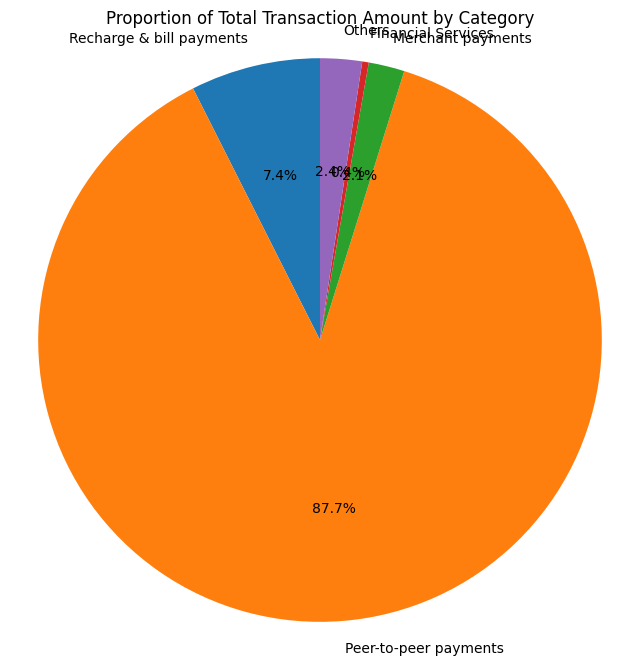

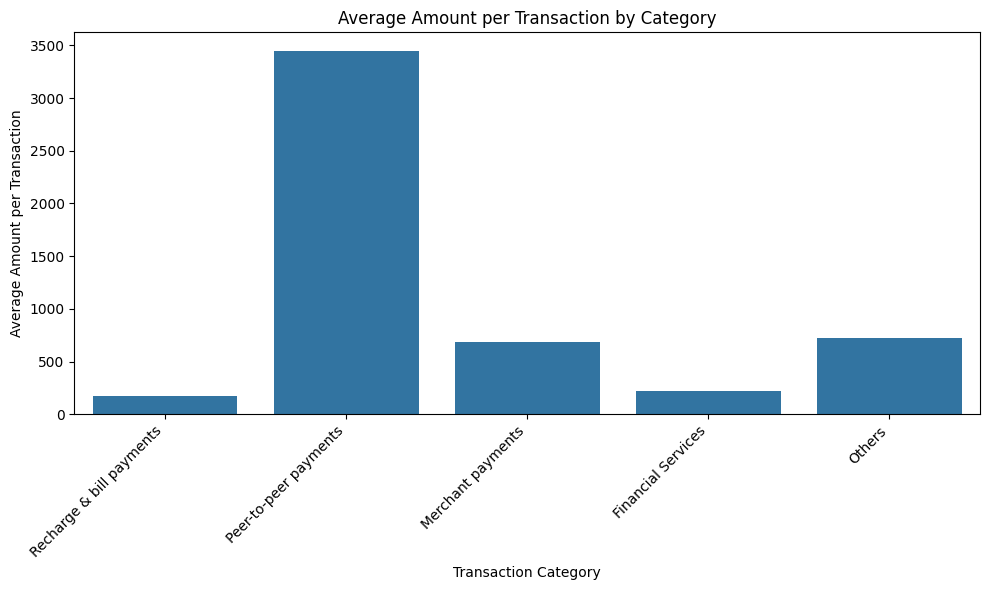

In [17]:
# Pie chart of transaction amounts by category
plt.figure(figsize=(8, 8))
plt.pie(df_agg_transaction_flat['amount'], labels=df_agg_transaction_flat['name'], autopct='%1.1f%%', startangle=90)
plt.title("Proportion of Total Transaction Amount by Category")
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Bar plot of average amount per transaction by category
plt.figure(figsize=(10, 6))
sns.barplot(x='name', y='amount_per_transaction', data=df_agg_transaction_flat)
plt.title("Average Amount per Transaction by Category")
plt.xlabel("Transaction Category")
plt.ylabel("Average Amount per Transaction")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [19]:
# Define the base raw URL for the data
base_raw_url = "https://raw.githubusercontent.com/PhonePe/pulse/master/data/"

# Define the relevant years and quarters based on the previous exploration
years = list(range(2018, 2025)) # Based on previous exploration, data is available from 2018 to 2024
quarters = [1, 2, 3, 4]

# Define the list of Indian states. This list is based on common knowledge of Indian states.
# A more robust approach would be to scrape the directory contents, but this is a reasonable starting point.
states = [
    "andaman-nicobar-islands", "andhra-pradesh", "arunachal-pradesh", "assam", "bihar",
    "chandigarh", "chhattisgarh", "dadra-nagar-haveli-daman-diu", "delhi", "goa",
    "gujarat", "haryana", "himachal-pradesh", "jammu-kashmir", "jharkhand",
    "karnataka", "kerala", "ladakh", "lakshadweep", "madhya-pradesh",
    "maharashtra", "manipur", "meghalaya", "mizoram", "nagaland",
    "odisha", "puducherry", "punjab", "rajasthan", "sikkim",
    "tamil-nadu", "telangana", "tripura", "uttar-pradesh", "uttarakhand",
    "west-bengal"
]

# Initialize an empty list to store the loaded DataFrames
all_transaction_dfs = []

# Iterate through each year, quarter, and state
for year in years:
    for quarter in quarters:
        for state in states:
            # Construct the full raw URL for the aggregated transaction data file
            url = base_raw_url + f"aggregated/transaction/country/india/state/{state}/{year}/{quarter}.json"

            # Load the JSON data from the constructed URL
            data = load_json_from_url(url)

            # If the data is loaded successfully and contains the expected 'transactionData' key
            if data and 'data' in data and 'transactionData' in data['data']:
                # Extract the 'transactionData' list
                transaction_data_list = data['data']['transactionData']

                # Convert the list of dictionaries into a pandas DataFrame
                df = pd.DataFrame(transaction_data_list)

                # Add columns for 'state', 'year', and 'quarter'
                df['state'] = state
                df['year'] = year
                df['quarter'] = quarter

                # Append the DataFrame to the list
                all_transaction_dfs.append(df)
            else:
                # Print a message if loading fails or key is not found
                print(f"Could not load data for state: {state}, year: {year}, quarter: {quarter} from {url}")

# Concatenate all the loaded DataFrames into a single DataFrame
if all_transaction_dfs:
    df_aggregated_transaction = pd.concat(all_transaction_dfs, ignore_index=True)
    print("\nSuccessfully loaded and combined aggregated transaction data for all available periods and states.")
    print("Combined DataFrame head:")
    display(df_aggregated_transaction.head())
    print("\nCombined DataFrame info:")
    display(df_aggregated_transaction.info())
else:
    df_aggregated_transaction = None
    print("\nNo data was loaded successfully.")

Error loading data from https://raw.githubusercontent.com/PhonePe/pulse/master/data/aggregated/transaction/country/india/state/andaman-nicobar-islands/2018/1.json: 404 Client Error: Not Found for url: https://raw.githubusercontent.com/PhonePe/pulse/master/data/aggregated/transaction/country/india/state/andaman-nicobar-islands/2018/1.json
Could not load data for state: andaman-nicobar-islands, year: 2018, quarter: 1 from https://raw.githubusercontent.com/PhonePe/pulse/master/data/aggregated/transaction/country/india/state/andaman-nicobar-islands/2018/1.json
Error loading data from https://raw.githubusercontent.com/PhonePe/pulse/master/data/aggregated/transaction/country/india/state/dadra-nagar-haveli-daman-diu/2018/1.json: 404 Client Error: Not Found for url: https://raw.githubusercontent.com/PhonePe/pulse/master/data/aggregated/transaction/country/india/state/dadra-nagar-haveli-daman-diu/2018/1.json
Could not load data for state: dadra-nagar-haveli-daman-diu, year: 2018, quarter: 1 fro

,name,paymentInstruments,state,year,quarter
0,Recharge & bill payments,"[{'type': 'TOTAL', 'count': 5027448, 'amount':...",andhra-pradesh,2018,1
1,Peer-to-peer payments,"[{'type': 'TOTAL', 'count': 3049646, 'amount':...",andhra-pradesh,2018,1
2,Merchant payments,"[{'type': 'TOTAL', 'count': 362672, 'amount': ...",andhra-pradesh,2018,1
3,Financial Services,"[{'type': 'TOTAL', 'count': 204305, 'amount': ...",andhra-pradesh,2018,1
4,Others,"[{'type': 'TOTAL', 'count': 395514, 'amount': ...",andhra-pradesh,2018,1



Combined DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4614 entries, 0 to 4613
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   name                4614 non-null   object
 1   paymentInstruments  4614 non-null   object
 2   state               4614 non-null   object
 3   year                4614 non-null   int64 
 4   quarter             4614 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 180.4+ KB


None

In [20]:
df_aggregated_transaction['type'] = df_aggregated_transaction['paymentInstruments'].apply(lambda x: x[0]['type'] if isinstance(x, list) and len(x) > 0 else None)
df_aggregated_transaction['count'] = df_aggregated_transaction['paymentInstruments'].apply(lambda x: x[0]['count'] if isinstance(x, list) and len(x) > 0 else None)
df_aggregated_transaction['amount'] = df_aggregated_transaction['paymentInstruments'].apply(lambda x: x[0]['amount'] if isinstance(x, list) and len(x) > 0 else None)

df_aggregated_transaction['count'] = df_aggregated_transaction['count'].astype(int)
df_aggregated_transaction['amount'] = df_aggregated_transaction['amount'].astype(float)

print("First 5 rows of df_aggregated_transaction after flattening and type conversion:")
display(df_aggregated_transaction.head())

print("\nData types of each column after flattening and type conversion:")
display(df_aggregated_transaction.dtypes)

First 5 rows of df_aggregated_transaction after flattening and type conversion:


,name,paymentInstruments,state,year,quarter,type,count,amount
0,Recharge & bill payments,"[{'type': 'TOTAL', 'count': 5027448, 'amount':...",andhra-pradesh,2018,1,TOTAL,5027448,8.922940e+08
1,Peer-to-peer payments,"[{'type': 'TOTAL', 'count': 3049646, 'amount':...",andhra-pradesh,2018,1,TOTAL,3049646,1.052425e+10
2,Merchant payments,"[{'type': 'TOTAL', 'count': 362672, 'amount': ...",andhra-pradesh,2018,1,TOTAL,362672,2.472976e+08
3,Financial Services,"[{'type': 'TOTAL', 'count': 204305, 'amount': ...",andhra-pradesh,2018,1,TOTAL,204305,4.480845e+07
4,Others,"[{'type': 'TOTAL', 'count': 395514, 'amount': ...",andhra-pradesh,2018,1,TOTAL,395514,2.876260e+08



Data types of each column after flattening and type conversion:


,0
name,object
paymentInstruments,object
state,object
year,int64
quarter,int64
type,object
count,int64
amount,float64


In [22]:
df_aggregated_transaction['amount_per_transaction'] = df_aggregated_transaction['amount'] / df_aggregated_transaction['count']
df_aggregated_transaction['amount_per_transaction'] = df_aggregated_transaction['amount_per_transaction'].replace([np.inf, -np.inf], 0)
df_aggregated_transaction['amount_per_transaction'] = df_aggregated_transaction['amount_per_transaction'].fillna(0)

df_time_trends = df_aggregated_transaction.groupby(['year', 'quarter']).agg(
    total_amount=('amount', 'sum'),
    total_count=('count', 'sum'),
    average_amount_per_transaction=('amount_per_transaction', 'mean')
).reset_index()

print("Time trends DataFrame:")
display(df_time_trends.head())

Time trends DataFrame:


,year,quarter,total_amount,total_count,average_amount_per_transaction
0,2018,1,1.706378e+11,133328824,1230.394531
1,2018,2,3.013926e+11,185355148,1404.864641
2,2018,3,4.706636e+11,338689963,1143.511899
3,2018,4,6.653222e+11,413962457,1247.872920
4,2019,1,9.831239e+11,704715694,1045.553901


In [23]:
df_state_amount_count = df_aggregated_transaction.groupby('state').agg(
    total_amount=('amount', 'sum'),
    total_count=('count', 'sum')
).reset_index()

df_state_avg_amount_per_transaction = df_aggregated_transaction.groupby('state')['amount_per_transaction'].mean().reset_index()
df_state_avg_amount_per_transaction.rename(columns={'amount_per_transaction': 'average_amount_per_transaction'}, inplace=True)

df_geographical_trends = pd.merge(df_state_amount_count, df_state_avg_amount_per_transaction, on='state')

print("Geographical trends DataFrame head:")
display(df_geographical_trends.head())

Geographical trends DataFrame head:


,state,total_amount,total_count,average_amount_per_transaction
0,andhra-pradesh,3.466908e+13,18918696723,1280.307407
1,arunachal-pradesh,2.744350e+11,160223357,1719.441090
2,assam,3.460792e+12,2262440836,1273.159606
3,bihar,1.790135e+13,10941026824,1167.131850
4,chandigarh,2.929066e+11,203855326,1408.530129


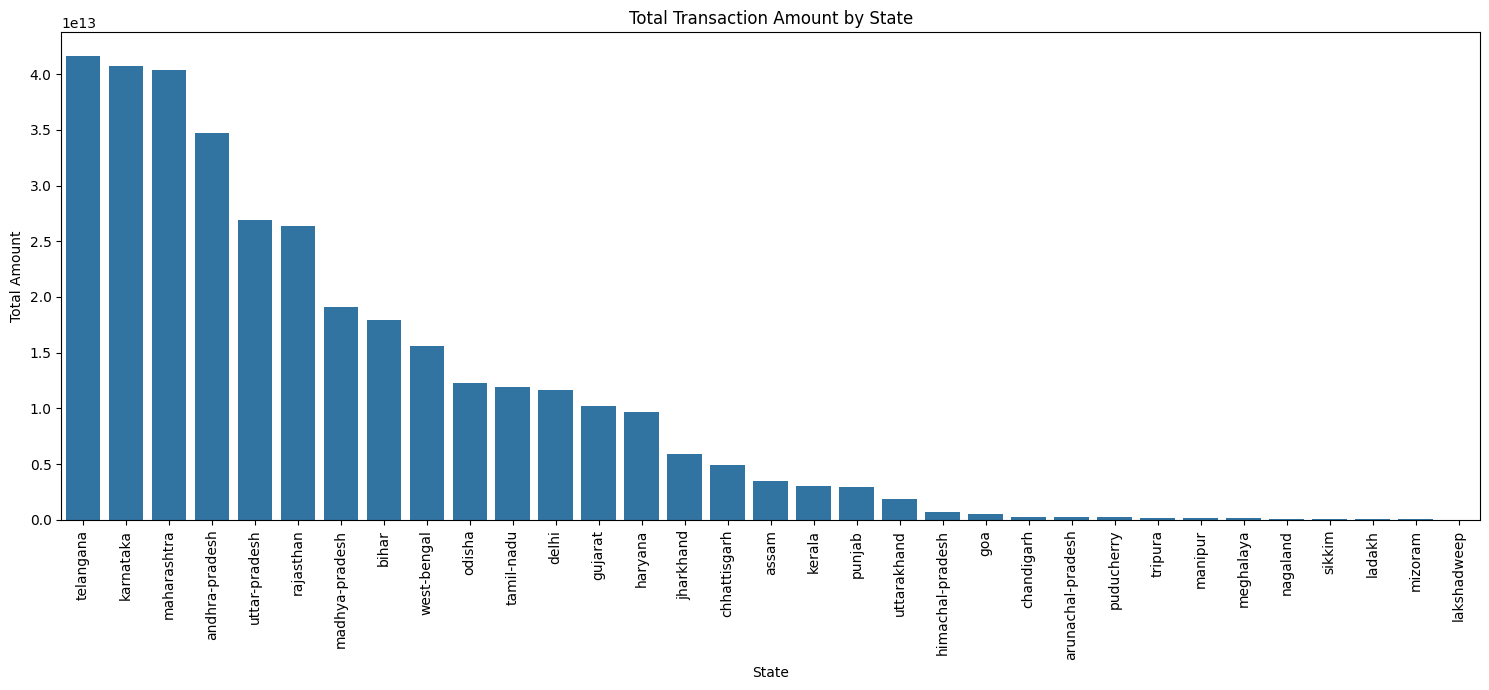

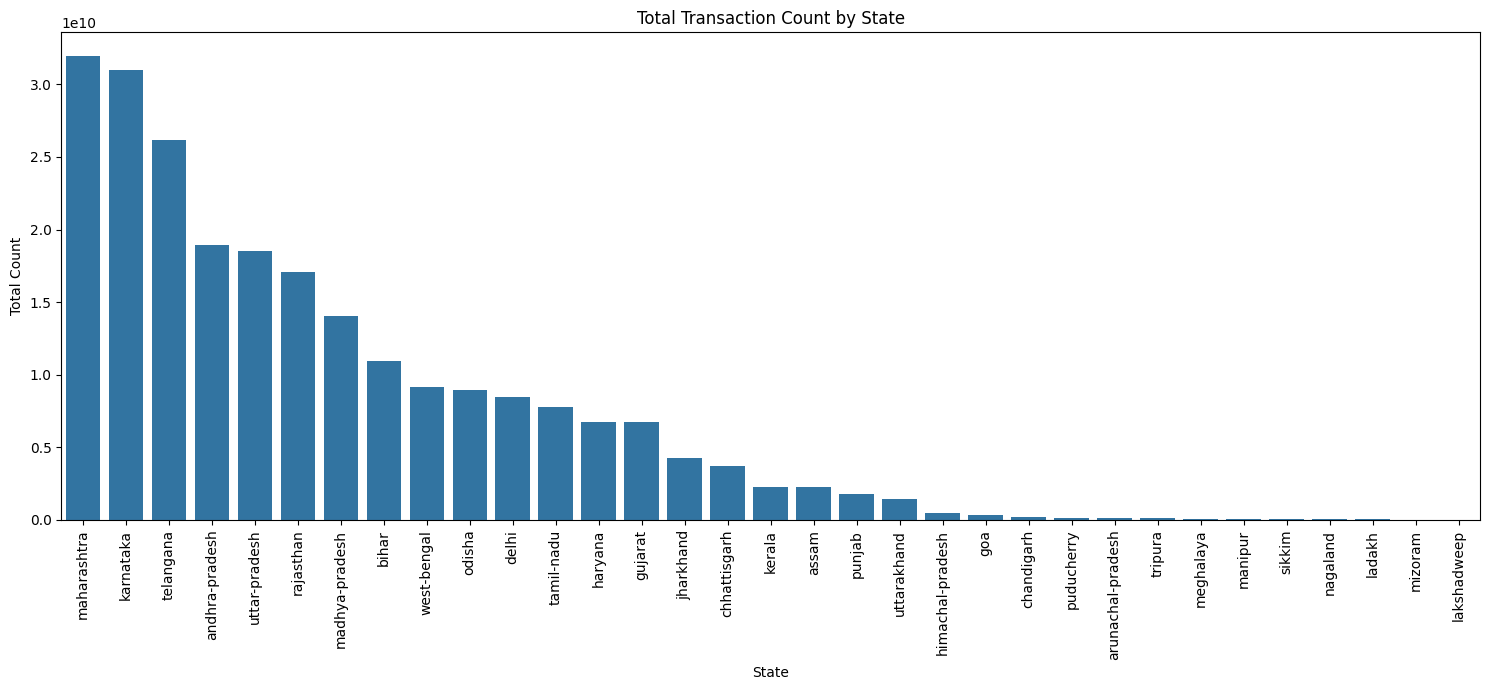

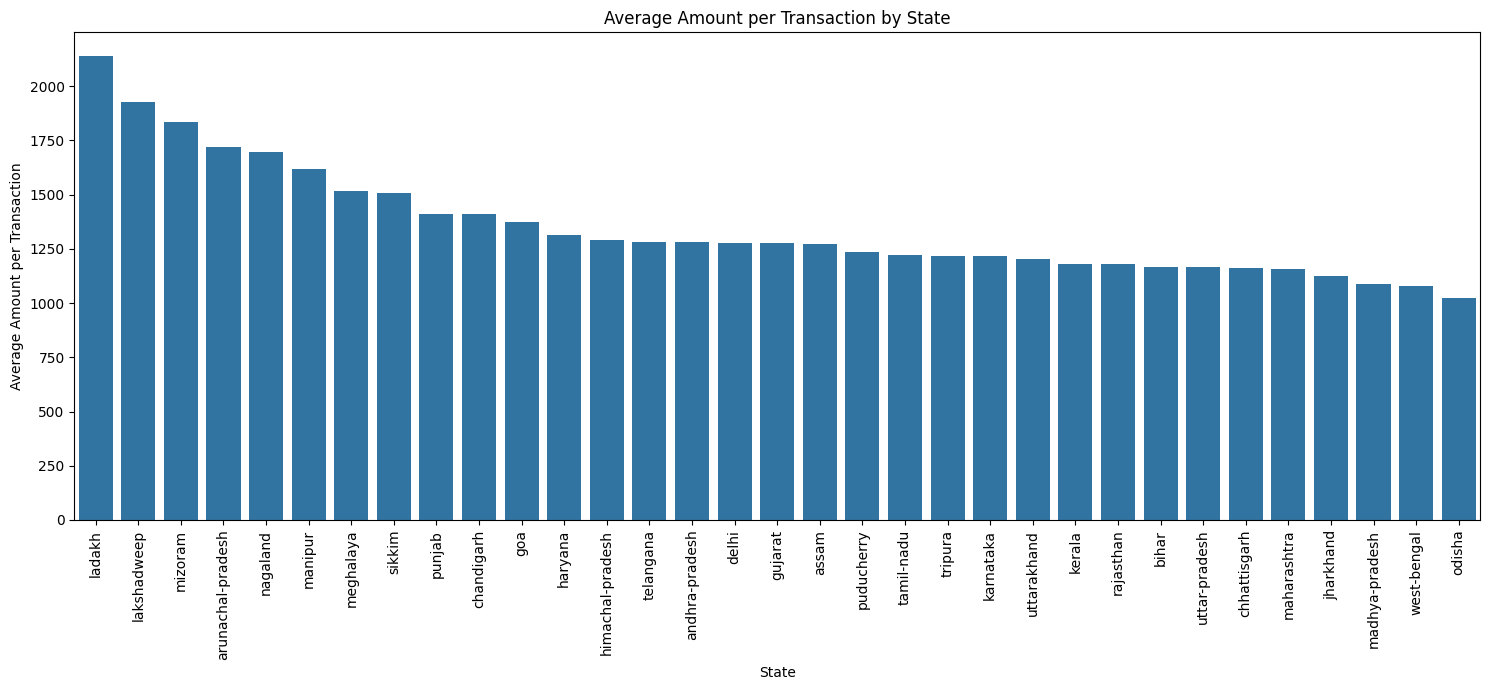

In [24]:
plt.figure(figsize=(15, 7))
sns.barplot(x='state', y='total_amount', data=df_geographical_trends.sort_values('total_amount', ascending=False))
plt.title("Total Transaction Amount by State")
plt.xlabel("State")
plt.ylabel("Total Amount")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 7))
sns.barplot(x='state', y='total_count', data=df_geographical_trends.sort_values('total_count', ascending=False))
plt.title("Total Transaction Count by State")
plt.xlabel("State")
plt.ylabel("Total Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 7))
sns.barplot(x='state', y='average_amount_per_transaction', data=df_geographical_trends.sort_values('average_amount_per_transaction', ascending=False))
plt.title("Average Amount per Transaction by State")
plt.xlabel("State")
plt.ylabel("Average Amount per Transaction")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

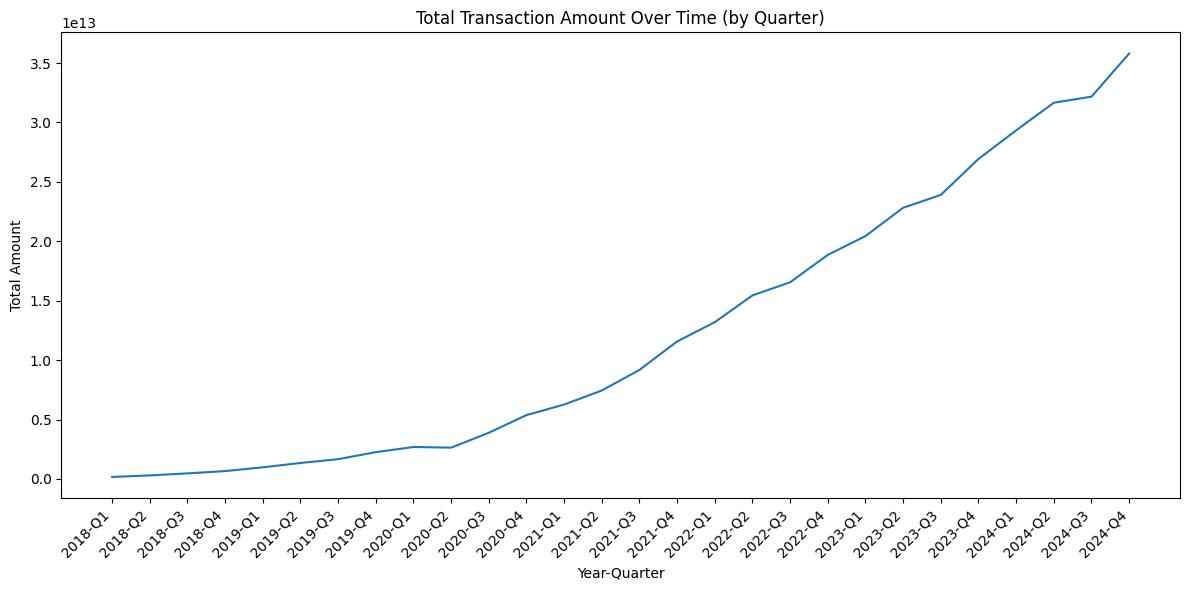

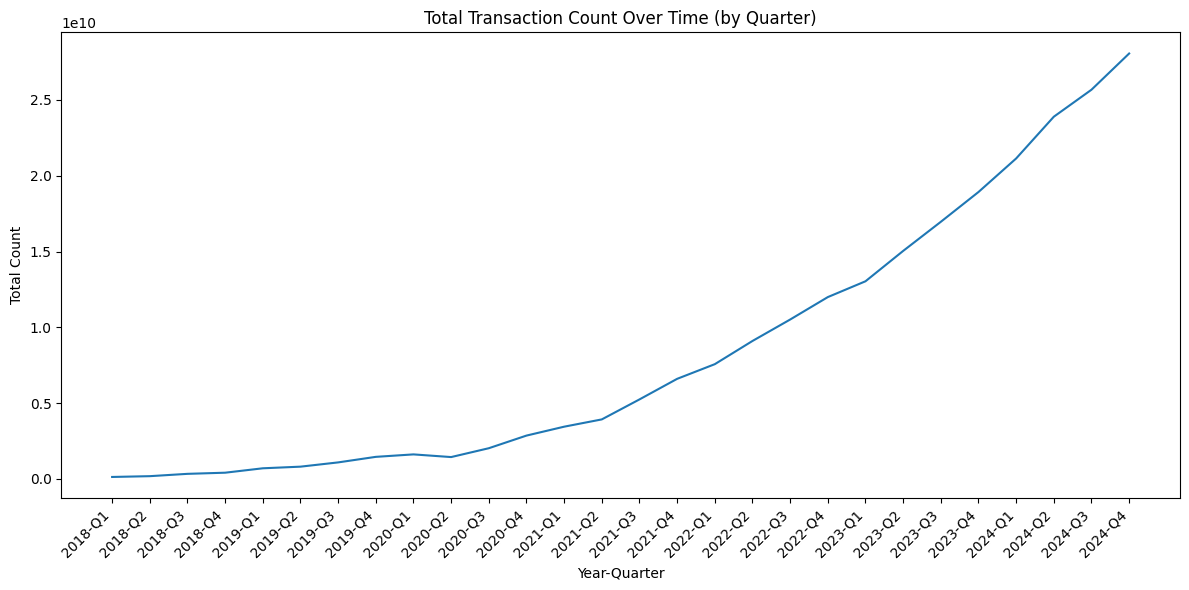

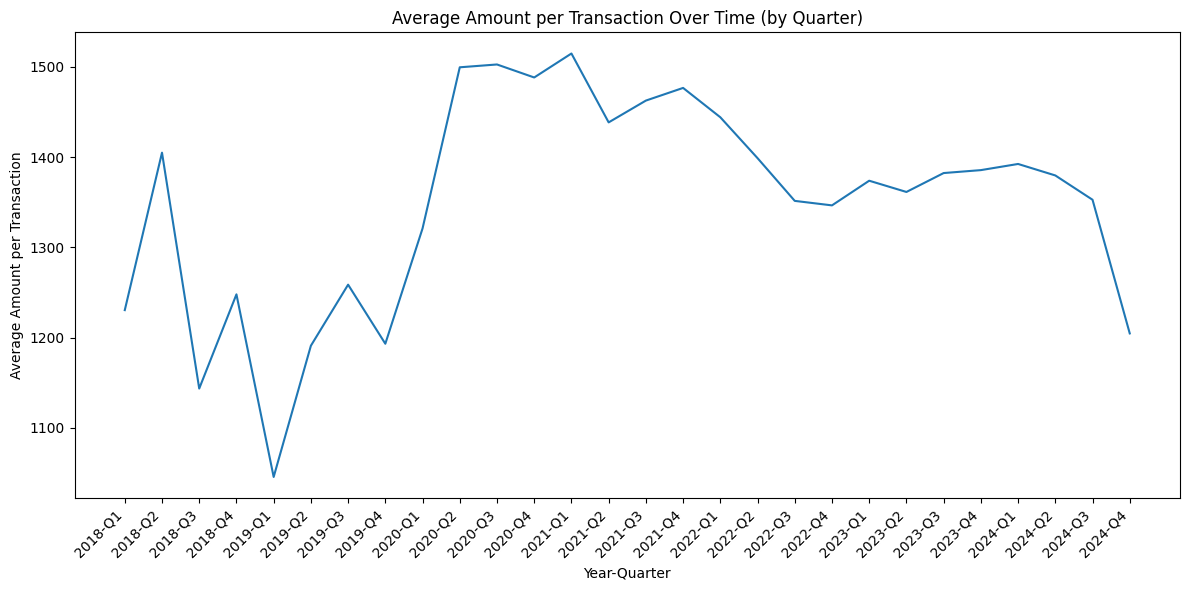

In [25]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_time_trends['year'].astype(str) + '-Q' + df_time_trends['quarter'].astype(str), y='total_amount', data=df_time_trends)
plt.title("Total Transaction Amount Over Time (by Quarter)")
plt.xlabel("Year-Quarter")
plt.ylabel("Total Amount")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x=df_time_trends['year'].astype(str) + '-Q' + df_time_trends['quarter'].astype(str), y='total_count', data=df_time_trends)
plt.title("Total Transaction Count Over Time (by Quarter)")
plt.xlabel("Year-Quarter")
plt.ylabel("Total Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x=df_time_trends['year'].astype(str) + '-Q' + df_time_trends['quarter'].astype(str), y='average_amount_per_transaction', data=df_time_trends)
plt.title("Average Amount per Transaction Over Time (by Quarter)")
plt.xlabel("Year-Quarter")
plt.ylabel("Average Amount per Transaction")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

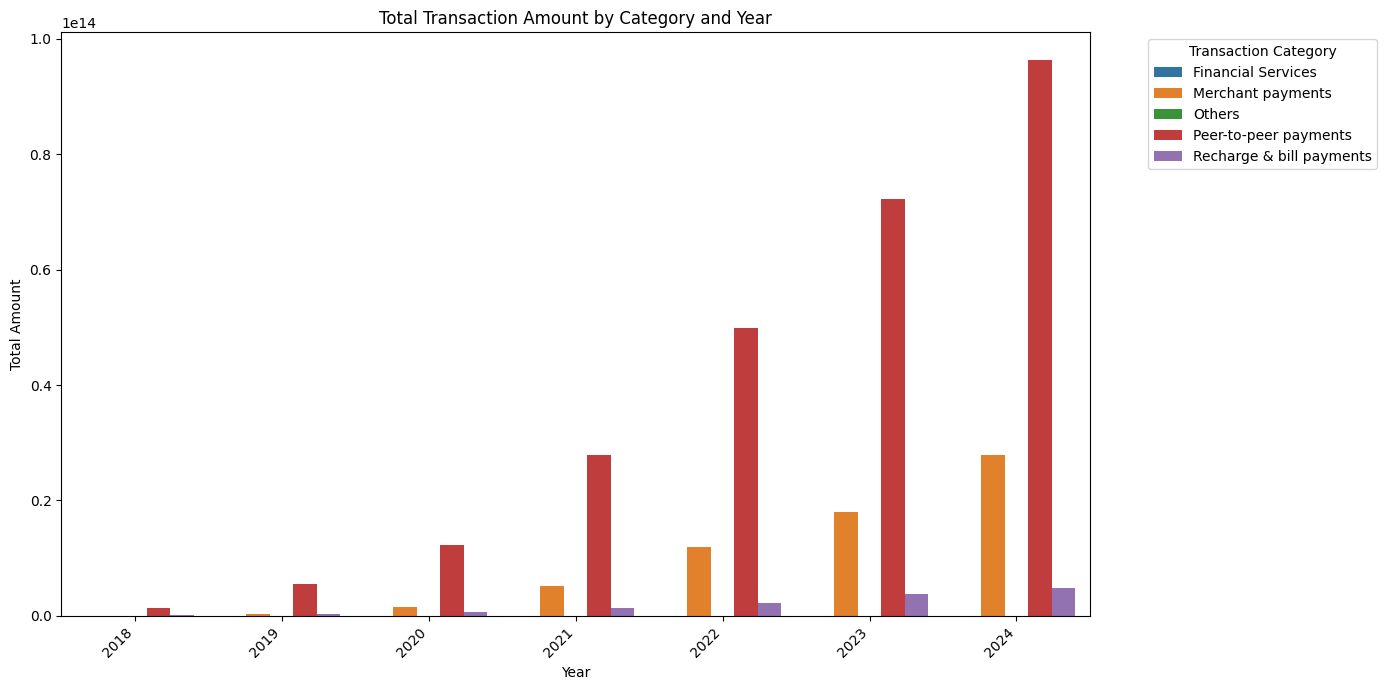

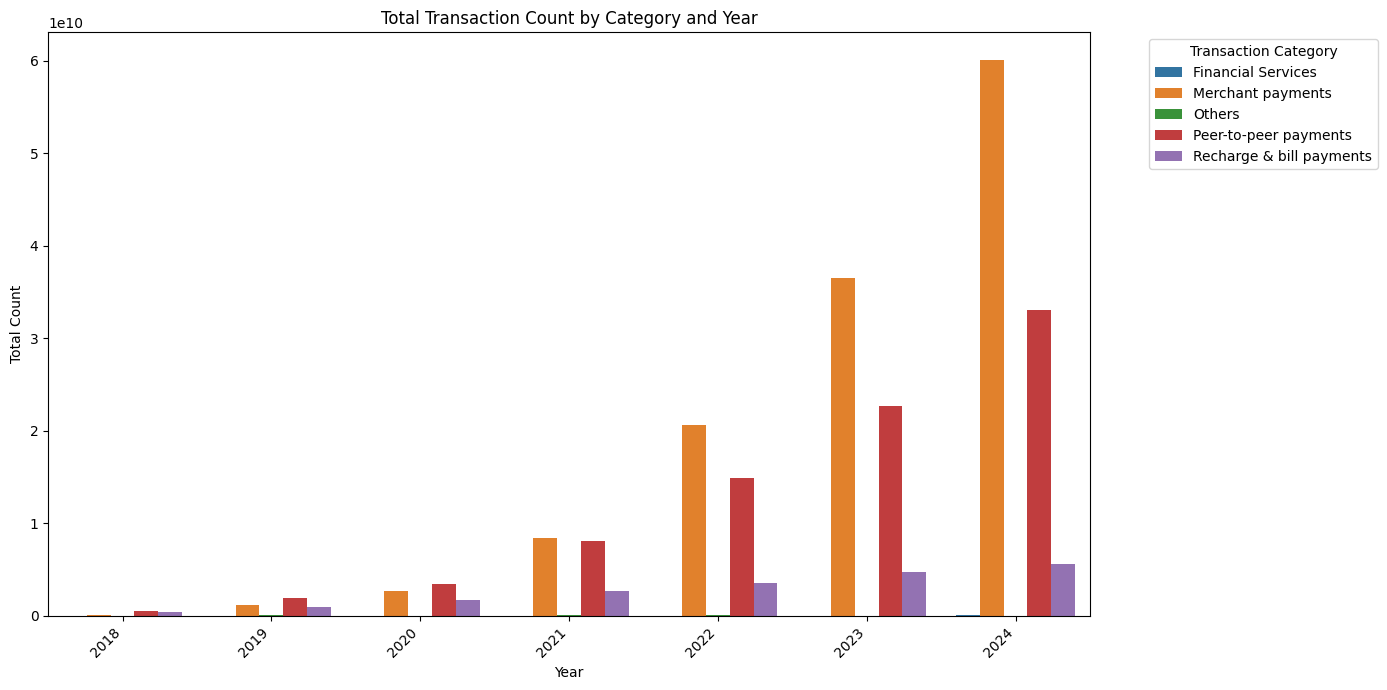

In [26]:
df_category_year_amount = df_aggregated_transaction.groupby(['year', 'name']).agg(
    total_amount=('amount', 'sum')
).reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(x='year', y='total_amount', hue='name', data=df_category_year_amount)
plt.title("Total Transaction Amount by Category and Year")
plt.xlabel("Year")
plt.ylabel("Total Amount")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transaction Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

df_category_year_count = df_aggregated_transaction.groupby(['year', 'name']).agg(
    total_count=('count', 'sum')
).reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(x='year', y='total_count', hue='name', data=df_category_year_count)
plt.title("Total Transaction Count by Category and Year")
plt.xlabel("Year")
plt.ylabel("Total Count")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transaction Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()